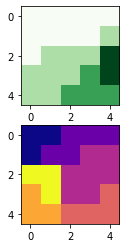

    pyr_ocs  nb  id_pyr  pyr_id  nb_tot  ratio  ocs
0       201   3       2       2       3  100.0    1
1       301   5       3       3       5  100.0    1
2       401   1       4       4       7   14.0    1
3       402   4       4       4       7   57.0    2
4       403   1       4       4       7   14.0    3
5       404   1       4       4       7   14.0    4
6       503   3       5       5       4   75.0    3
7       504   1       5       5       4   25.0    4
8       602   3       6       6       3  100.0    2
9       701   1       7       7       3   33.0    1
10      702   2       7       7       3   67.0    2
ocs         1      2     3     4
id_pyr                          
2       100.0    NaN   NaN   NaN
3       100.0    NaN   NaN   NaN
4        14.0   57.0  14.0  14.0
5         NaN    NaN  75.0  25.0
6         NaN  100.0   NaN   NaN
7        33.0   67.0   NaN   NaN


In [4]:
import matplotlib.pyplot as plt
import rasterio

import numpy as np
import pandas as pd

# Un raster ocs sommaire
l1 = [
    [1,1,1,1,1],
    [1,1,1,1,2],
    [1,2,2,2,4],
    [2,2,2,3,4],
    [2,2,3,3,3],
]

# La segmentation PyRam définie sur la même emprise
l2 = [
    [2,2,3,3,3],
    [2,3,3,4,4],
    [7,7,4,4,4],
    [6,7,4,4,5],
    [6,6,5,5,5],
]

# En numpy array
ocs = np.array(l1)
pyr = np.array(l2)

# En vue de former la matrice composée de l'id Pyram & de la classe OCS
pyr_100 = 100*pyr

# Facultatif > Aff sous pyplot ...
o, p = list(map(lambda npa: npa.astype(float),[ ocs, pyr]))

fig, axs = plt.subplots(2)
axs[0].imshow(o, cmap='Greens')
axs[1].imshow(p, cmap='plasma')
plt.show()

# Juxtaposition P+O
o_p = ocs + pyr_100

# Segments PyRam uniques et décompte
ct = np.vstack([np.unique(pyr, return_counts=True)]).T

# Décompte Segments + classes OCS
ct_o_p = np.vstack([np.unique(o_p, return_counts=True)]).T

# Conv. en pandas df
pd_pyr = pd.DataFrame(ct, columns=['pyr_id', 'nb_tot'])
pd_o_p = pd.DataFrame(ct_o_p, columns=['pyr_ocs', 'nb'])
pd_o_p['id_pyr'] = pd_o_p['pyr_ocs']//100

# Jointure et calcul ratio de compo OCS sur chaque segm. Pyr
ct_merge = pd.merge(pd_o_p,
         pd_pyr,
         how='inner',
         left_on='id_pyr',
         right_on='pyr_id')

ct_merge['ratio'] = round(ct_merge['nb']/ct_merge['nb_tot'], 2)*100
# Récup n° cl. ocs
ct_merge['ocs'] = ct_merge['pyr_ocs']%100

print(ct_merge)

# Pivot avec affichage de classe ocs en colonnes en vue d'appliquer la fn `apply`
# déterminant la classe définie dans la nomenclature BDF v2
piv = ct_merge.pivot(index='id_pyr', columns='ocs', values='ratio')
print(piv)
